# subtitles
This notebook explores the use of the `pysrt` library to analyze subtitle files. These .srt files are simply text files with specific formatting that allows them to be read by media players. The goal is to be able to assemble a scene's entire conversation and attribute individual lines to characters.

In [1]:
import pandas as pd
import pysrt
import pyAudioAnalysis.audioSegmentation
import datetime

In [2]:
subs = pysrt.open('subtitles/hobbs_shaw.srt')

In [3]:
# subtitle files (.srt) are explicitly numbered, and start at 1
subs.insert(0, subs[0])

In [4]:
len(subs)

2704

In [5]:
subs[1].text

'("Time in a Bottle"\nby Yungblud playing)'

In [6]:
print(subs[62].text)

I want her on the run
with no place to turn.


In [7]:
print(subs[62].start.hours)
print(subs[62].start.minutes)
print(subs[62].start.seconds)
print(subs[62].start.milliseconds)

0
4
32
522


# Comparison with actual audio
We can compare the subtitles with the audio in a scene we've previously identified.

In [8]:
file = ('extracted_audio/prison_stereo.wav')

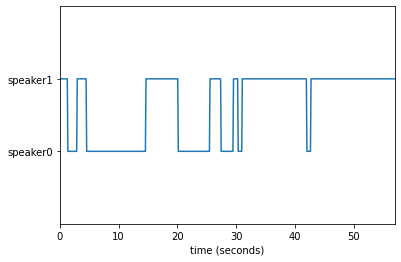

CPU times: user 29.3 s, sys: 1.91 s, total: 31.2 s
Wall time: 10.3 s


In [9]:
%%time
clusters = pyAudioAnalysis.audioSegmentation.speaker_diarization(file, 2, mid_window=.8, mid_step=0.1, short_window=0.02, lda_dim=0, plot_res=True)

In [10]:
len(clusters)

570

Helen Mirren:  12:47-12:49    :01-:03
Jason Statham: 12:49-12:51    :03-:05
Helen Mirren:  12:51-13:00    :05-:14
Jason Statham: 13:00-13:02    :14-:16
Silence
Helen Mirren:  13:05-13:12    :19-:26
Jason Statham: 13:12-13:15    :26-:29
Double:        13:15-13:17    :29-:31
Jason Statham: 13:19-13:24    :33-:38


In [31]:
convert_timestamp(766)
# first subtitle after 12:46 is subs[265]

'12:46'

In [33]:
subs[265].text

"That's my boy."

In [ ]:
# frame converted to HH:MM:SS, units of seconds
# audio segmentation has one-tenth of a second
# subtitle has HH:MM:SS:MS

In [ ]:
# speaker change comes at frame 766 + 14 tenths of a second
# 00:12:47,400
# subtitle 265 is at 00:12:47,725

# speaker change comes at frame 766 + 30 tenths of a second
# 00:12:49,000
# subtitle 266 is at 00:12:49,102, ends at 00:12:51,103

In [62]:
part = subs.slice(starts_after={'minutes': 12, 'seconds': 47, 'milliseconds': 400}, ends_before={'minutes': 12, 'seconds': 49, 'milliseconds': 0})

In [66]:
part = subs.at(minutes=12, seconds=47, milliseconds=400)

In [67]:
part

In [69]:
part[0].index

264

In [57]:
part = subs.slice(starts_after={'minutes': 12, 'seconds': 50, 'milliseconds': 400}, ends_after={'minutes': 12, 'seconds': 50, 'milliseconds': 0})

In [72]:
print(subs[265].text)
print(subs[266].text)
print(subs[267].text)
print(subs[268].text)
print(subs[269].text)
print(subs[270].text)

That's my boy.
No wonder we left
the family business.
She loves you, you know.
All you got to do is
pick up the phone, Decks.
Look at me.
You're her big brother.
She looks up to you.


In [87]:
print(subs[271].start.hours)
print(subs[271].start.minutes)
print(subs[271].start.seconds)
print(subs[271].start.milliseconds)

0
13
0
613


In [96]:
time_obj = subs[271].start.to_time()

In [97]:
time_obj

datetime.time(0, 13, 0, 613000)

In [102]:
# first speaker change is at clusters[13]
# frame 766 = 600 seconds
# plus 1300 milliseconds
first_speaker_change_time = datetime.time(0, 12, 47, 300000)

In [108]:
first_speaker_change_pysrt = pysrt.SubRipTime.from_time(first_speaker_change_time)

In [110]:
first_subtitle = subs.at(first_speaker_change_pysrt)

In [111]:
first_subtitle

In [119]:
# second speaker change is at clusters[29]
# frame 766 = 12 minutes, 46 seconds
# plus 2900 milliseconds
second_speaker_change_time = datetime.time(0, 12, 49, 900000)

In [120]:
second_speaker_change_pysrt = pysrt.SubRipTime.from_time(second_speaker_change_time)

In [121]:
jason_subtitle = subs.at(second_speaker_change_pysrt)

In [123]:
print(jason_subtitle.text)

No wonder we left
the family business.


In [77]:
# 00:13:00,613 is 00:00:14,613 is 146 cluster portions, is clusters[146]

In [ ]:
part = subs.slice(starts_after={'minutes': 12, 'seconds': 50, 'milliseconds': 400}, ends_after={'minutes': 12, 'seconds': 50, 'milliseconds': 0})

# Speaker Changes
We have to work through two challenges.
1. pyAudioAnalysis' `speaker_diarization` doesn't actually tell us when someone is speaking, only the character who last spoke (whether currently speaking ot not). 
2. Frame extraction and subtitle timestamps may not line up perfectly. This is due to the issue of extracting frames from a 23.976p video.

Here are the speaker changes manually identified from `speaker_diarization`. I've attempted to "line up" the subtitles with the speaker changes by manually trying a time offset.

In [44]:
# will turn this into a function
for x in range(12, 14): # 13
    print(clusters[x], x)
print()
for x in range(28, 30): # 29
    print(clusters[x], x)
print()
for x in range(44, 46): # 45
    print(clusters[x], x)
print()
for x in range(145, 147): #146
    print(clusters[x], x)
print()
for x in range(200, 202): #201
    print(clusters[x], x)

1.0 12
0.0 13

0.0 28
1.0 29

1.0 44
0.0 45

0.0 145
1.0 146

1.0 200
0.0 201



In [46]:
# first speaker change is at clusters[13]
# frame 766 = 12 minutes, 46 seconds
# plus 1,300 milliseconds
first_speaker_change_time = datetime.time(0, 12, 47, 300000)
first_speaker_change_time = datetime.time(0, 12, 47, 800000)
first_speaker_change_pysrt = pysrt.SubRipTime.from_time(first_speaker_change_time)
# should be helen, "That's my boy"
subs.at(first_speaker_change_pysrt).text

"That's my boy."

In [29]:
subs.at(first_speaker_change_pysrt)[0].index

264

In [31]:
subs[265].text

"That's my boy."

In [47]:
# second speaker change is at clusters[29]
# frame 766 = 12 minutes, 46 seconds
# plus 2,900 milliseconds
second_speaker_change_time = datetime.time(0, 12, 48, 900000)
second_speaker_change_time = datetime.time(0, 12, 49, 400000)
second_speaker_change_pysrt = pysrt.SubRipTime.from_time(second_speaker_change_time)
# should be Jason, "No wonder"
subs.at(second_speaker_change_pysrt).text

'No wonder we left\nthe family business.'

In [35]:
subs[(subs.at(second_speaker_change_pysrt)[0].index + 1)].text

'No wonder we left\nthe family business.'

In [49]:
# third speaker change is at clusters[44]
# frame 766 = 12 minutes, 46 seconds
# plus 4,400 milliseconds
third_speaker_change_time = datetime.time(0, 12, 50, 400000)
third_speaker_change_time = datetime.time(0, 12, 50, 900000)
third_speaker_change_pysrt = pysrt.SubRipTime.from_time(third_speaker_change_time)
# should be Helen, "she loves you"
subs.at(third_speaker_change_pysrt).text

'No wonder we left\nthe family business.'

In [38]:
subs[(subs.at(third_speaker_change_pysrt)[0].index + 1)].text

'She loves you, you know.'

In [50]:
# fourth speaker change is at clusters[146]
# frame 766 = 12 minutes, 46 seconds
# plus 14,600 milliseconds
fourth_speaker_change_time = datetime.time(0, 13, 0, 600000)
fourth_speaker_change_time = datetime.time(0, 13, 1, 100000)
fourth_speaker_change_pysrt = pysrt.SubRipTime.from_time(fourth_speaker_change_time)
# should be Jason, "used to"
subs.at(fourth_speaker_change_pysrt).text

'Used to.'

In [40]:
subs[(subs.at(fourth_speaker_change_pysrt)[0].index + 1)].text

'Used to.'

In [52]:
# fifth speaker change is at clusters[201]
# frame 766 = 12 minutes, 46 seconds
# plus 20,100 milliseconds
fifth_speaker_change_time = datetime.time(0, 13, 6, 100000)
fifth_speaker_change_time = datetime.time(0, 13, 6, 600000)
fifth_speaker_change_pysrt = pysrt.SubRipTime.from_time(fifth_speaker_change_time)
# should be Helen, "Well, one day"
subs.at(fifth_speaker_change_pysrt).text

'Well, one day, I just hope\nthat I walk through that door'

# Subtitles Onscreen Flag
To assist with dialogue attribution, we can create a flag to identify if there are subtitle onscreen during a given frame. This will require converting a frame number (in its filename) to a subtitle timestamp.

In [65]:
if subs.at(datetime.time(0, 12, 47, 0)) or subs.at(datetime.time(0, 12, 47, 999)):
    print('subtitle found')

subtitle found


In [71]:
def frame_to_time(seconds): 
    seconds = seconds % (24 * 3600) 
    hours = seconds // 3600
    seconds %= 3600
    minutes = seconds // 60
    seconds %= 60
    
    timestamp = datetime.time(hours, minutes, seconds)
    
    return timestamp

In [73]:
first_frame = frame_to_time(766)

In [75]:
if subs.at(first_frame) or subs.at(first_frame - datetime.time(0, 0, 0, 1)):
    print('subtitle found')

subtitle found


In [81]:
next_frame = frame_to_time(785)

In [88]:
if subs.at(next_frame) or subs.at(next_frame.replace(microsecond=999000)):
    print('subtitle found')

subtitle found


In [ ]:
subtitle_onscreen = []
for frame in frame_choice:
    time = frame_to_time(frame)
    
    if subs.at(time) or subs.at(time.replace(microsecond=999000)):
        subtitle_onscreen.append(1)
    else:
        subtitle_onscreen.append(0)